# 히스토그램

단변수 데이터의 빈도수를 그래프로 표현

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("classic")

In [2]:
df = pd.read_csv("C:\\Users\\user\\Desktop\\데이터 분석\\datasets\\auto-mpg.csv")

In [3]:
df.head()

,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


In [4]:
df.columns = ['mpg', 'cylinders', 'displacement', 'horesepower', 'weight', 
              'accerlation', 'model year', 'origin', 'name']

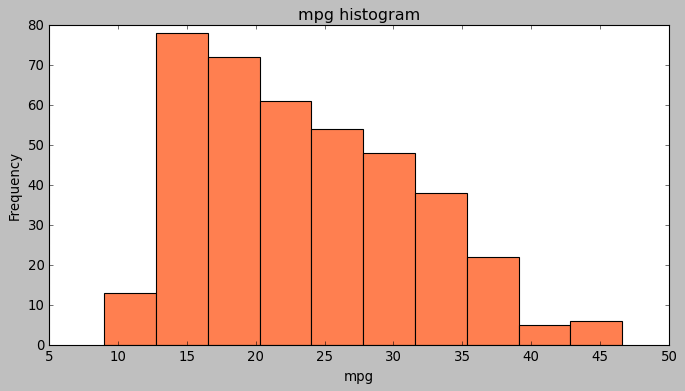

In [5]:
df['mpg'].plot(kind='hist', bins=10, color='coral',figsize=(10,5))

plt.title("mpg histogram")
plt.xlabel('mpg')
plt.show()

# 산점도
서로 다른 두 변수 사이의 관계

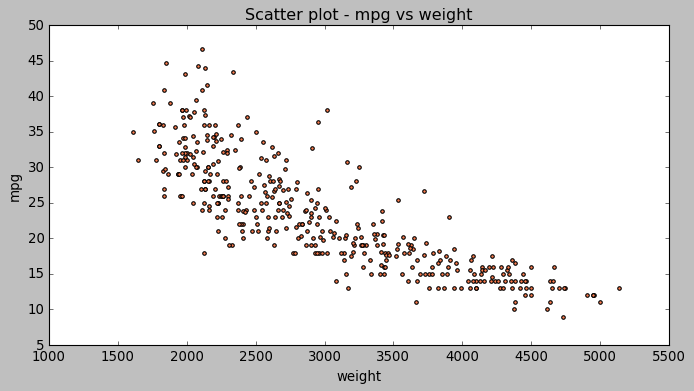

In [6]:
df.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))
plt.title('Scatter plot - mpg vs weight')
plt.show()

### 버블 차트
값의 크기에 따라 점의 크기를 표현

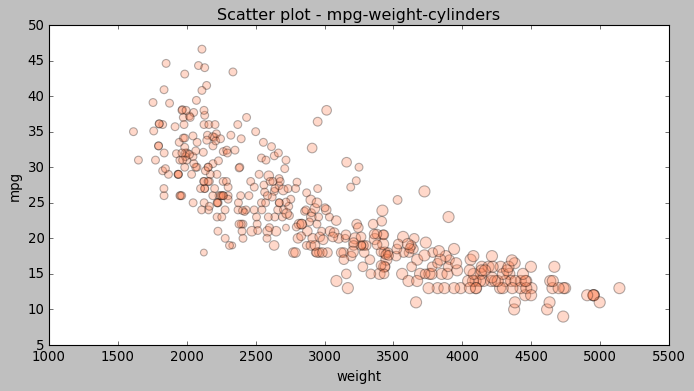

In [12]:
cylinders_size = df.cylinders / df.cylinders.max() * 100

df.plot(kind="scatter", x='weight', y='mpg', c='coral', figsize=(10, 5),
       s=cylinders_size, alpha=0.3)
plt.title("Scatter plot - mpg-weight-cylinders")
plt.show()

# 그래프 파일로 저장

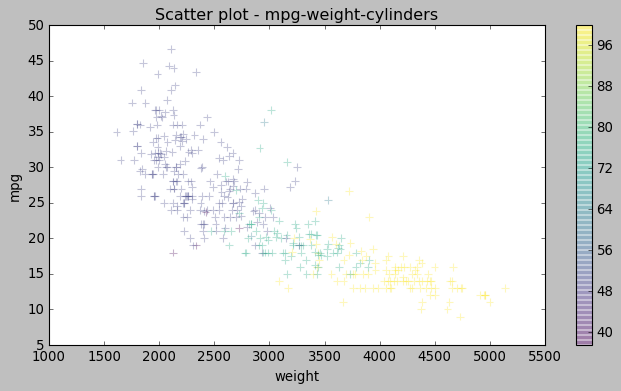

In [15]:
cylinders_size = df.cylinders / df.cylinders.max() * 100

df.plot(kind="scatter", x='weight', y='mpg', marker='+', figsize=(10, 5),
        cmap='viridis', c=cylinders_size, s=50, alpha=0.3)
plt.title("Scatter plot - mpg-weight-cylinders")

plt.savefig("./scatter.png")
plt.savefig("./scatter_transparent.png", transparent=True)  # 그림 배경 투명하게 지정

plt.show()

# 파이 차트

In [16]:
plt.style.use("default")

df['count'] = 1
df_origin = df.groupby('origin').sum()  # origin(제조 국가) 열을 기준으로 그룹화, 합계 연산
print(df_origin.head())

           mpg  cylinders  displacement    weight  accerlation  model year  \
origin                                                                       
1       4982.8       1548       60922.5  833617.0       3731.4       18757   
2       1952.4        291        7640.0  169631.0       1175.1        5307   
3       2405.6        324        8114.0  175477.0       1277.6        6118   

        count  
origin         
1         248  
2          70  
3          79  


In [18]:
df_origin.index = ['USA', 'EU', 'JPN']

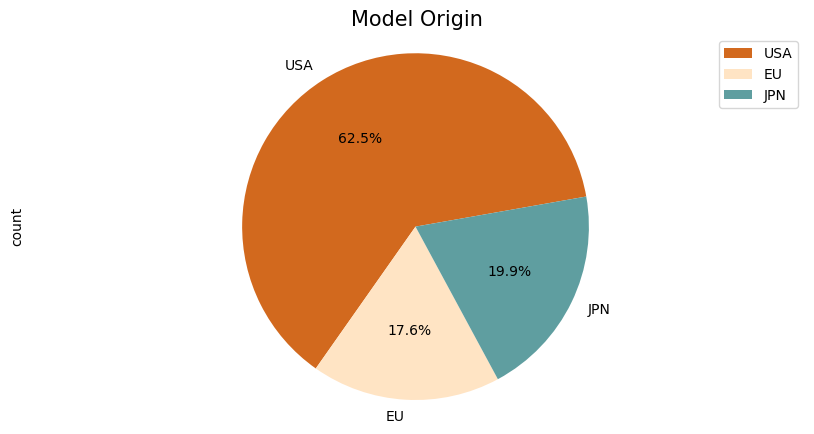

In [20]:
df_origin['count'].plot(kind='pie',
                       figsize=(10,5),
                       autopct='%1.1f%%', # 퍼센트 표시 소수점 이하 첫재자리까지
                       startangle=10,
                       colors=['chocolate','bisque','cadetblue']
                       )
plt.title('Model Origin', size=15)
plt.axis('equal') # 파이 차트 비율을 원에 가깝게 조절
plt.legend(labels=df_origin.index, loc='upper right')
plt.show()

# 박스 plot
범주형 데이터의 분포를 파악하는데 적합


Text(0.5, 1.0, '제조국가별 연비 분포(수평 box plot)')

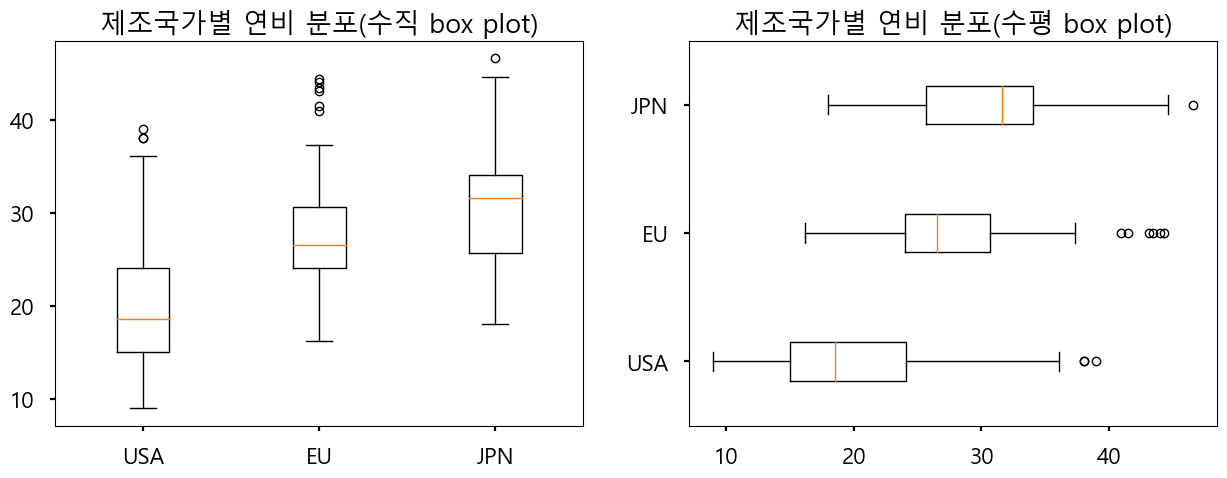

In [23]:
plt.rc('font', family='Malgun Gothic')

plt.style.use('seaborn-poster')
plt.rcParams['axes.unicode_minus']=False

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
            labels=['USA','EU','JPN']
           )
ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
           labels=['USA','EU','JPN'],
            vert=False
           )

ax1.set_title("제조국가별 연비 분포(수직 box plot)")
ax2.set_title("제조국가별 연비 분포(수평 box plot)")